# Credit card default prediction

### Dataset source: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset/data

### Problem statement
#### Business Objective
Estimate the probability that a credit card client will default on their payment in the next month, enabling risk teams to make decisions such as adjusting credit limits, prioritizing collections, or setting monitoring strategies to reduce expected loss.

##### Target Variable
The target variable is "**default.payment.next.month**", which indicates whether a client will default on their credit card payment in the next month. It is a binary variable where 1 indicates default and 0 indicates no default.

##### Input data
- **Dataset size**: 30,000 clients from a Taiwanese bank (UCI/Kaggle dataset).
- **Features**:  23, excluding ID and target variable.
1. **Client demographics** (SEX, EDUCATION, MARRIAGE, AGE).
2. **Financial standing** (LIMIT_BAL).
3. **History of past payments** (PAY_0, PAY_2 to PAY_6).
4. **Bill statement amounts** (BILL_AMT1 to BILL_AMT6).
5. **Previous payment amounts** (PAY_AMT1 to PAY_AMT6).

##### Output
Calibrated probability of default within the next month per client.







#### Data understanding
To understand the dataset, I would take the following steps:

- **Load the data**: Read the UCI_Credit_Card.csv file into a pandas DataFrame.
- **Initial Exploration**: Examine the first few rows, column names, and data types.
- **Descriptive Statistics**: Generate summary statistics for numerical columns to understand their distribution (e.g., mean, median, min, max).
- **Meaningful names** for columns
- **Missing Values**: Check for missing values in each column to identify data quality issues.
- **Target Variable Analysis**: Analyze the distribution of the 'default.payment.next.month' column to spot outliers or skewness.
- **Feature Analysis**:
1. **For categorical features**, I'll examine the unique values and their frequencies.
2. **For numerical features**, I'll look at their distributions using histograms.
- **Correlation Analysis**: Investigate relationships between features and the target variable, 'default.payment.next.month'.

In [199]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('data/UCI_Credit_Card.csv')
# Examine the first few rows, column names, and data types
data.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [200]:
# Examine column names, and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [201]:
# Total number of rows and columns
data.shape

(30000, 25)

In [202]:
# Check for missing values in each column to identify data quality issues.
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [203]:
# Rename columns to be more descriptive
data.rename(columns={
    'LIMIT_BAL': 'Credit_Limit',
    'SEX': 'Gender',
    'EDUCATION': 'Education',
    'MARRIAGE': 'Marital_Status',
    'AGE': 'Age',
    'PAY_0': 'Repayment_Status_Sept',
    'PAY_2': 'Repayment_Status_Aug',
    'PAY_3': 'Repayment_Status_Jul',
    'PAY_4': 'Repayment_Status_Jun',
    'PAY_5': 'Repayment_Status_May',
    'PAY_6': 'Repayment_Status_Apr',
    'BILL_AMT1': 'Bill_Amount_Sept',
    'BILL_AMT2': 'Bill_Amount_Aug',
    'BILL_AMT3': 'Bill_Amount_Jul',
    'BILL_AMT4': 'Bill_Amount_Jun',
    'BILL_AMT5': 'Bill_Amount_May',
    'BILL_AMT6': 'Bill_Amount_Apr',
    'PAY_AMT1': 'Previous_Payment_Sept',
    'PAY_AMT2': 'Previous_Payment_Aug',
    'PAY_AMT3': 'Previous_Payment_Jul',
    'PAY_AMT4': 'Previous_Payment_Jun',
    'PAY_AMT5': 'Previous_Payment_May',
    'PAY_AMT6': 'Previous_Payment_Apr',
    'default.payment.next.month': 'Default_Payment'
}, inplace=True)

# Display the first 5 rows with new column names
data.head()

,ID,Credit_Limit,Gender,Education,Marital_Status,Age,Repayment_Status_Sept,Repayment_Status_Aug,Repayment_Status_Jul,Repayment_Status_Jun,...,Bill_Amount_Jun,Bill_Amount_May,Bill_Amount_Apr,Previous_Payment_Sept,Previous_Payment_Aug,Previous_Payment_Jul,Previous_Payment_Jun,Previous_Payment_May,Previous_Payment_Apr,Default_Payment
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [204]:
# Analyze the distribution of the target variable
default_counts = data['Default_Payment'].value_counts()
print(default_counts)

Default_Payment
0    23364
1     6636
Name: count, dtype: int64


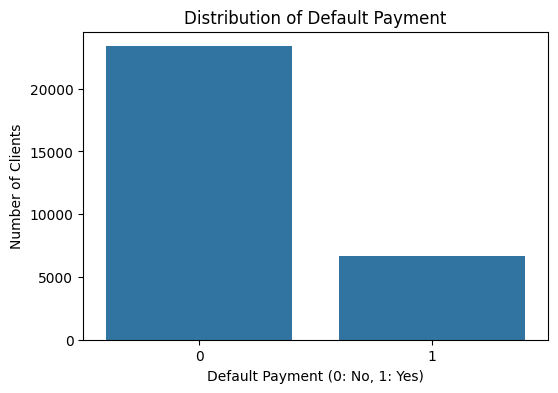

In [205]:
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Default_Payment', data=data)
plt.title('Distribution of Default Payment')
plt.xlabel('Default Payment (0: No, 1: Yes)')
plt.ylabel('Number of Clients')
plt.show()

#### Data preparation
After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling. Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with sklearn.
- Drop ID column as it is not needed for prediction.
- For Education, 1=graduate school, 2=university, 3=high school, 4=others. Values 0, 5, and 6 are not documented and can be grouped into 'others' (4).
- For Marital Status, 1=married, 2=single, 3=others. The value 0 is not documented and can be grouped into 'others' (3).
- Verify the unique values after cleaning.
- Save the cleaned data to a new CSV file.
- Load the cleaned data to verify.

In [206]:
# Drop the ID column as it is not needed for prediction
if 'ID' in data.columns:
    data = data.drop('ID', axis=1)

In [207]:
# The dataset description indicates that for Education, 1=graduate school, 2=university, 3=high school, 4=others.
# Values 0, 5, and 6 are not documented and can be grouped into 'others' (4).
data['Education'] = data['Education'].replace([0, 5, 6], 4)

In [208]:
# For Marital Status, 1=married, 2=single, 3=others.
# The value 0 is not documented and can be grouped into 'others' (3).
data['Marital_Status'] = data['Marital_Status'].replace(0, 3)

In [209]:
# Verify the unique values after cleaning
print("Unique values in 'Education' after cleaning:", sorted(data['Education'].unique()))
print("Unique values in 'Marital_Status' after cleaning:", sorted(data['Marital_Status'].unique()))

Unique values in 'Education' after cleaning: [np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
Unique values in 'Marital_Status' after cleaning: [np.int64(1), np.int64(2), np.int64(3)]


In [210]:
data.head()

,Credit_Limit,Gender,Education,Marital_Status,Age,Repayment_Status_Sept,Repayment_Status_Aug,Repayment_Status_Jul,Repayment_Status_Jun,Repayment_Status_May,...,Bill_Amount_Jun,Bill_Amount_May,Bill_Amount_Apr,Previous_Payment_Sept,Previous_Payment_Aug,Previous_Payment_Jul,Previous_Payment_Jun,Previous_Payment_May,Previous_Payment_Apr,Default_Payment
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [211]:
# Save the cleaned data to a new CSV file
data.to_csv('data/credit_card_cleaned.csv', index=False)

print("Cleaned data saved to 'credit_card_cleaned.csv'")

Cleaned data saved to 'credit_card_cleaned.csv'


In [212]:
data = pd.read_csv('data/credit_card_cleaned.csv')
data.head()

,Credit_Limit,Gender,Education,Marital_Status,Age,Repayment_Status_Sept,Repayment_Status_Aug,Repayment_Status_Jul,Repayment_Status_Jun,Repayment_Status_May,...,Bill_Amount_Jun,Bill_Amount_May,Bill_Amount_Apr,Previous_Payment_Sept,Previous_Payment_Aug,Previous_Payment_Jul,Previous_Payment_Jun,Previous_Payment_May,Previous_Payment_Apr,Default_Payment
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [213]:
# Total number of rows and columns
data.shape

(30000, 24)

In [214]:
# Check for missing values in each column to identify data quality issues.
data.isnull().sum()

Credit_Limit             0
Gender                   0
Education                0
Marital_Status           0
Age                      0
Repayment_Status_Sept    0
Repayment_Status_Aug     0
Repayment_Status_Jul     0
Repayment_Status_Jun     0
Repayment_Status_May     0
Repayment_Status_Apr     0
Bill_Amount_Sept         0
Bill_Amount_Aug          0
Bill_Amount_Jul          0
Bill_Amount_Jun          0
Bill_Amount_May          0
Bill_Amount_Apr          0
Previous_Payment_Sept    0
Previous_Payment_Aug     0
Previous_Payment_Jul     0
Previous_Payment_Jun     0
Previous_Payment_May     0
Previous_Payment_Apr     0
Default_Payment          0
dtype: int64

#### Modeling
With final dataset in hand, it is now time to build some models. Here, we build a number of different regression models with the Default_Payment as the target. In building models, we should explore different parameters and be sure to cross-validate your findings.

In [215]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the cleaned data
df_cleaned = pd.read_csv('data/credit_card_cleaned.csv')

# Define features (X) and target (y)
X = df_cleaned.drop('Default_Payment', axis=1)
y = df_cleaned['Default_Payment']

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=np.number).columns

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a preprocessing pipeline
# To speed up the process, we'll use min_frequency in OneHotEncoder.
# This groups rare categories into a single 'infrequent' feature,
# reducing the total number of columns and speeding up model training.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01), categorical_features)
    ])

--- Tuning Lasso Regression with different alphas ---
Alpha: 0.0010 -> RMSE: 0.39, R2: 0.1186
Alpha: 0.0028 -> RMSE: 0.39, R2: 0.1182
Alpha: 0.0077 -> RMSE: 0.39, R2: 0.1160
Alpha: 0.0215 -> RMSE: 0.39, R2: 0.1078
Alpha: 0.0599 -> RMSE: 0.40, R2: 0.0830
Alpha: 0.1668 -> RMSE: 0.41, R2: -0.0001
Alpha: 0.4642 -> RMSE: 0.41, R2: -0.0001
Alpha: 1.2915 -> RMSE: 0.41, R2: -0.0001
Alpha: 3.5938 -> RMSE: 0.41, R2: -0.0001
Alpha: 10.0000 -> RMSE: 0.41, R2: -0.0001


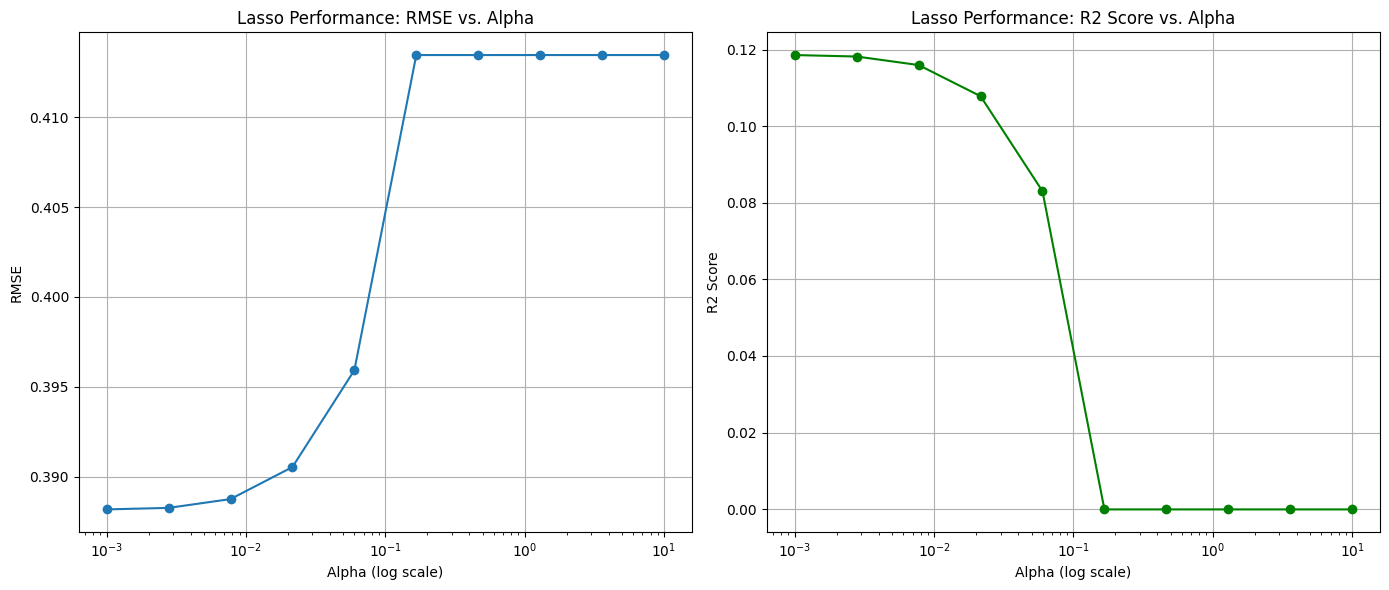


Best Alpha based on RMSE: 0.0010
Best Lasso Model Results: {'RMSE': np.float64(0.3881712550630051), 'R2': 0.1185664750049541}


In [216]:
# --- Hyperparameter Tuning for Lasso Regression ---
# We will test a range of alpha values to find the optimal one for Lasso Regression.
alphas = np.logspace(-3, 1, 10)
lasso_results = {}

print("--- Tuning Lasso Regression with different alphas ---")
for alpha in alphas:
    # Create a new Lasso pipeline with the current alpha
    # Increased max_iter to ensure convergence for different alpha values
    tuned_lasso_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                           ('regressor', Lasso(alpha=alpha, random_state=42, max_iter=2000))])

    # Train the model on the full training data
    tuned_lasso_pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = tuned_lasso_pipeline.predict(X_test)

    # Evaluate the model
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    lasso_results[alpha] = {'RMSE': rmse, 'R2': r2}
    print(f"Alpha: {alpha:.4f} -> RMSE: {rmse:.2f}, R2: {r2:.4f}")

# --- Visualize Lasso Tuning Results ---
lasso_results_df = pd.DataFrame(lasso_results).T

plt.figure(figsize=(14, 6))

# Plot RMSE vs. Alpha
plt.subplot(1, 2, 1)
plt.plot(lasso_results_df.index, lasso_results_df['RMSE'], marker='o')
plt.xscale('log')
plt.title('Lasso Performance: RMSE vs. Alpha')
plt.xlabel('Alpha (log scale)')
plt.ylabel('RMSE')
plt.grid(True)

# Plot R2 vs. Alpha
plt.subplot(1, 2, 2)
plt.plot(lasso_results_df.index, lasso_results_df['R2'], marker='o', color='green')
plt.xscale('log')
plt.title('Lasso Performance: R2 Score vs. Alpha')
plt.xlabel('Alpha (log scale)')
plt.ylabel('R2 Score')
plt.grid(True)

plt.tight_layout()
plt.show()

# Find and print the best alpha based on the lowest RMSE
best_alpha = lasso_results_df['RMSE'].idxmin()
print(f"\nBest Alpha based on RMSE: {best_alpha:.4f}")
print(f"Best Lasso Model Results: {lasso_results[best_alpha]}")